### Install pyGenomeViz

In [ ]:
%pip install pygenomeviz

### Single Genome Track

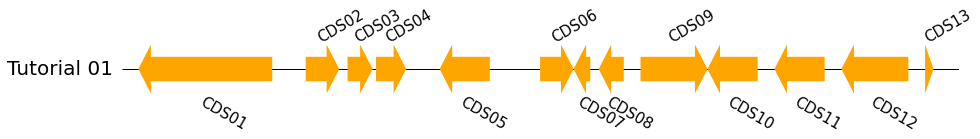

In [1]:
from pygenomeviz import GenomeViz

# Tutorial dataset (cds_list = start, end, strand)
name, genome_size = "Tutorial 01", 5000
cds_list = ((100, 900, -1), (1100, 1300, 1), (1350, 1500, 1), (1520, 1700, 1), (1900, 2200, -1), (2500, 2700, 1), (2700, 2800, -1), (2850, 3000, -1), (3100, 3500, 1), (3500, 3800, -1), (3900, 4200, -1), (4300, 4700, -1), (4800, 4850, 1))

gv = GenomeViz()
track = gv.add_feature_track(name, genome_size)
for idx, cds in enumerate(cds_list, 1):
    start, end, strand = cds
    track.add_feature(start, end, strand, label=f"CDS{idx:02d}")
fig = gv.plotfig()


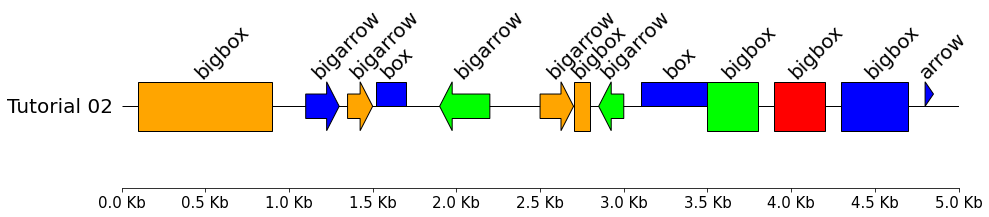

In [2]:
from pygenomeviz import GenomeViz
import random

name, genome_size = "Tutorial 02", 5000
cds_list = ((100, 900, -1), (1100, 1300, 1), (1350, 1500, 1), (1520, 1700, 1), (1900, 2200, -1), (2500, 2700, 1), (2700, 2800, -1), (2850, 3000, -1), (3100, 3500, 1), (3500, 3800, -1), (3900, 4200, -1), (4300, 4700, -1), (4800, 4850, 1))

gv = GenomeViz(tick_style="axis")
track = gv.add_feature_track(name, genome_size)

plotstyles = ("bigarrow", "arrow", "bigbox", "box")
colors = ("orange", "blue", "lime", "red")
for idx, cds in enumerate(cds_list, 1):
    start, end, strand = cds
    plotstyle = random.choice(plotstyles)
    color = random.choice(colors)
    # User can setting various parameters
    track.add_feature(
        start,
        end,
        strand,
        label=plotstyle,
        labelsize=20,
        facecolor=color,
        plotstyle=plotstyle,
        labelvpos="top",
        labelrotation=45,
        linewidth=1,
    )
fig = gv.plotfig()


### Multiple Genome Track & Link

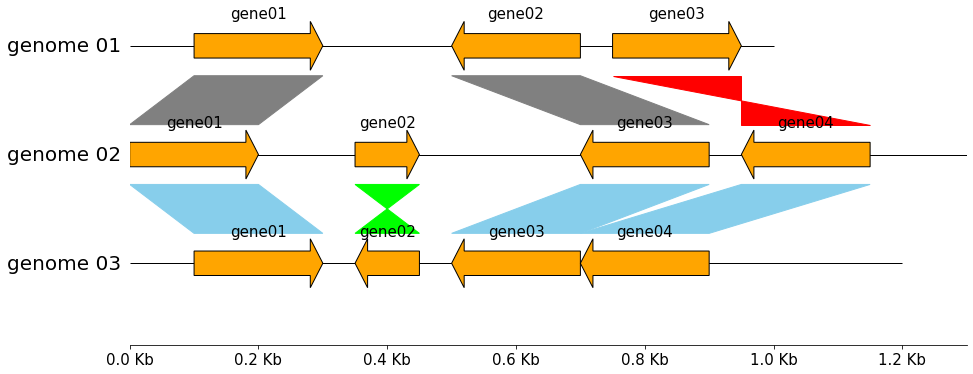

In [3]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((100, 300, 1), (500, 700, -1), (750, 950, 1)), },
    {"name": "genome 02", "size": 1300, "cds_list": ((0, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1)), },
    {"name": "genome 03", "size": 1200, "cds_list": ((100, 300, 1), (350, 450, -1), (500, 700, -1), (700, 900, -1)), },
)

gv = GenomeViz(tick_style="axis")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand = cds
        track.add_feature(
            start,
            end,
            strand,
            label=f"gene{idx:02d}",
            linewidth=1,
            labelrotation=0,
            labelvpos="top",
            labelhpos="center",
            labelha="center",
        )

# Link between "genome 01" and "genome 02"
gv.add_link(("genome 01", 100, 300), ("genome 02", 0, 200))
gv.add_link(("genome 01", 500, 700), ("genome 02", 700, 900))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Link between "genome 02" and "genome 03"
gv.add_link(("genome 02", 0, 200), ("genome 03", 100, 300), normal_color="skyblue", inverted_color="lime")
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), normal_color="skyblue", inverted_color="lime")
gv.add_link(("genome 02", 700, 900), ("genome 03", 500, 700), normal_color="skyblue", inverted_color="lime")
gv.add_link(("genome 03", 700, 900), ("genome 02", 950, 1150), normal_color="skyblue", inverted_color="lime")# 

fig = gv.plotfig()


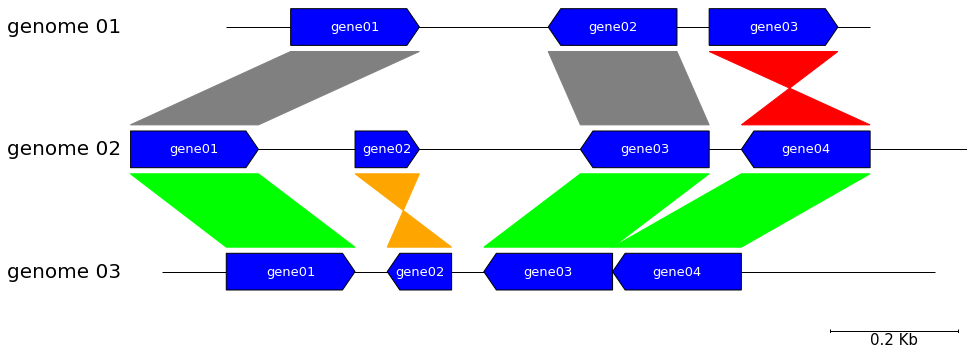

In [4]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((100, 300, 1), (500, 700, -1), (750, 950, 1)), },
    {"name": "genome 02", "size": 1300, "cds_list": ((1, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1)), },
    {"name": "genome 03", "size": 1200, "cds_list": ((100, 300, 1), (350, 450, -1), (500, 700, -1), (700, 900, -1)), },
)

gv = GenomeViz(feature_track_ratio=0.5, tick_track_ratio=0.5, arrow_shaft_ratio=1.0, tick_style="bar", align_type="center")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand = cds
        track.add_feature(
            start,
            end,
            strand,
            label=f"gene{idx:02d}",
            labelcolor="white",
            labelsize=13,
            labelrotation=0,
            labelvpos="center",
            labelhpos="center",
            labelha="center",
            facecolor="blue",
            linewidth=1,
        )

# Link between "genome 01" and "genome 02"
gv.add_link(("genome 01", 100, 300), ("genome 02", 1, 200))
gv.add_link(("genome 01", 500, 700), ("genome 02", 700, 900))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Link between "genome 02" and "genome 03"
gv.add_link(("genome 02", 1, 200), ("genome 03", 100, 300), normal_color="lime", inverted_color="orange")
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), normal_color="lime", inverted_color="orange")
gv.add_link(("genome 02", 700, 900), ("genome 03", 500, 700), normal_color="lime", inverted_color="orange")
gv.add_link(("genome 03", 700, 900), ("genome 02", 950, 1150), normal_color="lime", inverted_color="orange")# 

fig = gv.plotfig()